In [ ]:
#Importing libraries

In [29]:
!pip install lifelines

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ipywidgets as widgets
from ipywidgets import interactive
import tkinter as tk
from tkinter import ttk
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
#Reading Dataset

In [32]:
df=pd.read_csv("EmployeeAttrition.csv")

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [36]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [37]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [38]:
#funcion for encoding categorical values

In [39]:
def encode_columns(df, encoding_type='label'):

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    if encoding_type == 'label':

        for col in categorical_columns:
            df[col] = pd.factorize(df[col])[0]

    elif encoding_type == 'onehot':

        df = pd.get_dummies(df, columns=categorical_columns)

    return df


In [40]:
df_encoded = encode_columns(df, encoding_type='label')

In [41]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


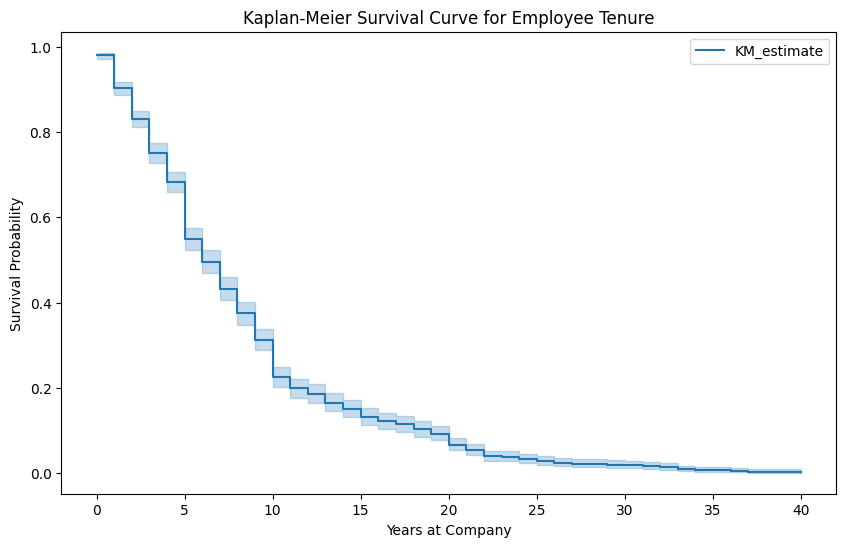

In [42]:
#Kaplan-Meier survival curve
kmf = KaplanMeierFitter()
t=df['YearsAtCompany']
c=df['Attrition']
kmf.fit(t,c)
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Kaplan-Meier Survival Curve for Employee Tenure')
plt.xlabel('Years at Company')
plt.ylabel('Survival Probability')
plt.show()


In [43]:
kmf.median_survival_time_

6.0

In [44]:
def plot_km(col):
  ax = plt.subplot(111)
  for r in df[col].unique():
    ix = df[col] == r
    kmf.fit(t[ix], c[ix],label=r)
    kmf.plot(ax=ax)

#Log-rank test results
def print_logrank(col):
  log_rank = pairwise_logrank_test(df['YearsAtCompany'],df[col], df['Attrition'])
  return log_rank.summary

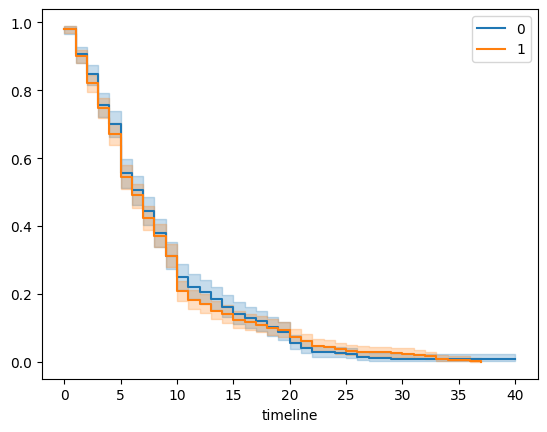

In [45]:
plot_km('Gender')

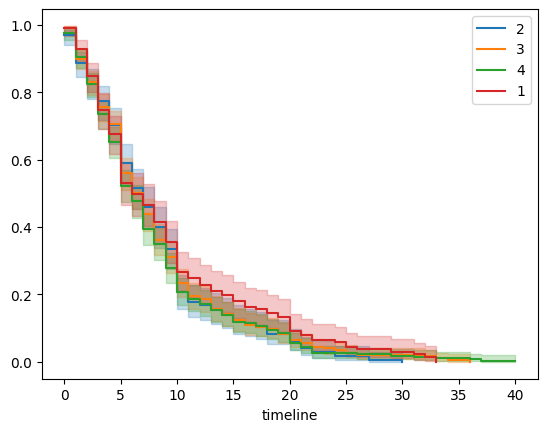

In [46]:
plot_km('EnvironmentSatisfaction')

In [22]:
#histogram

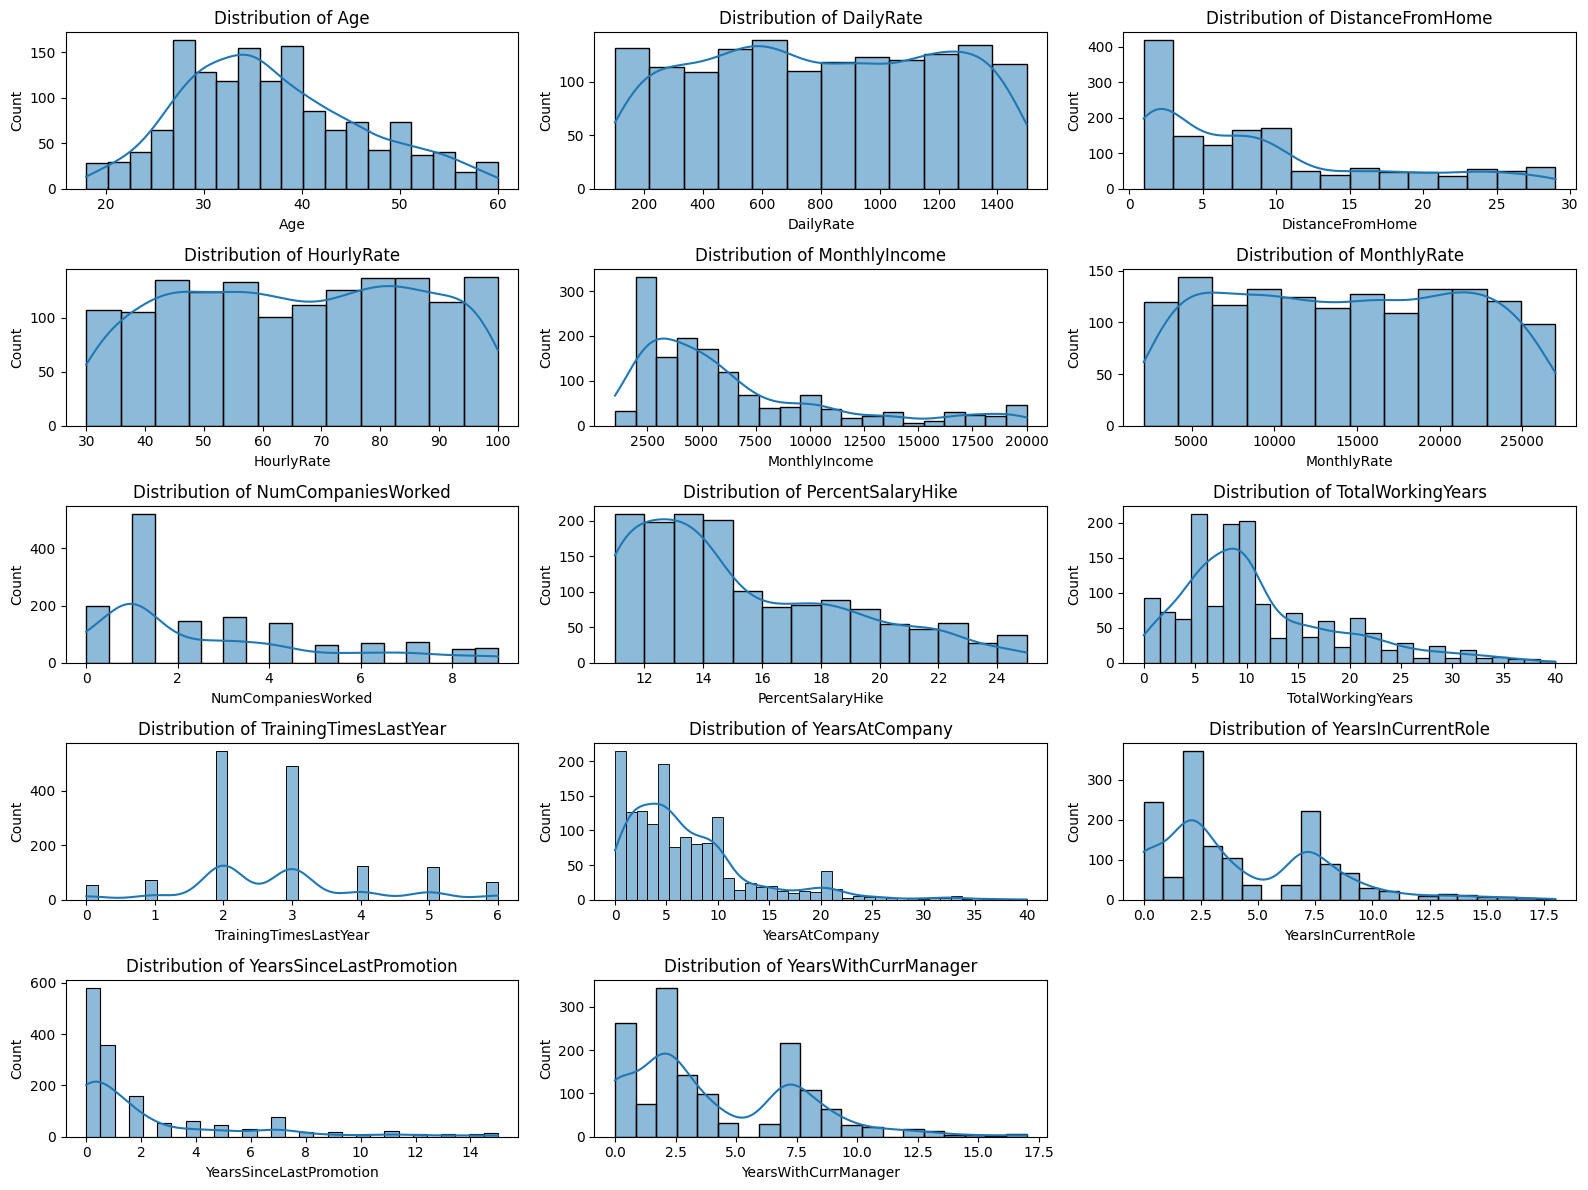

In [23]:
num = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', \
       'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
num_data = df_encoded[num]

plt.figure(figsize = (16,12))

for i, column in enumerate(num_data.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(num_data[column],kde = True)
    plt.title('Distribution of {}'.format(column))

plt.tight_layout()
plt.show()

In [24]:
#bargraph

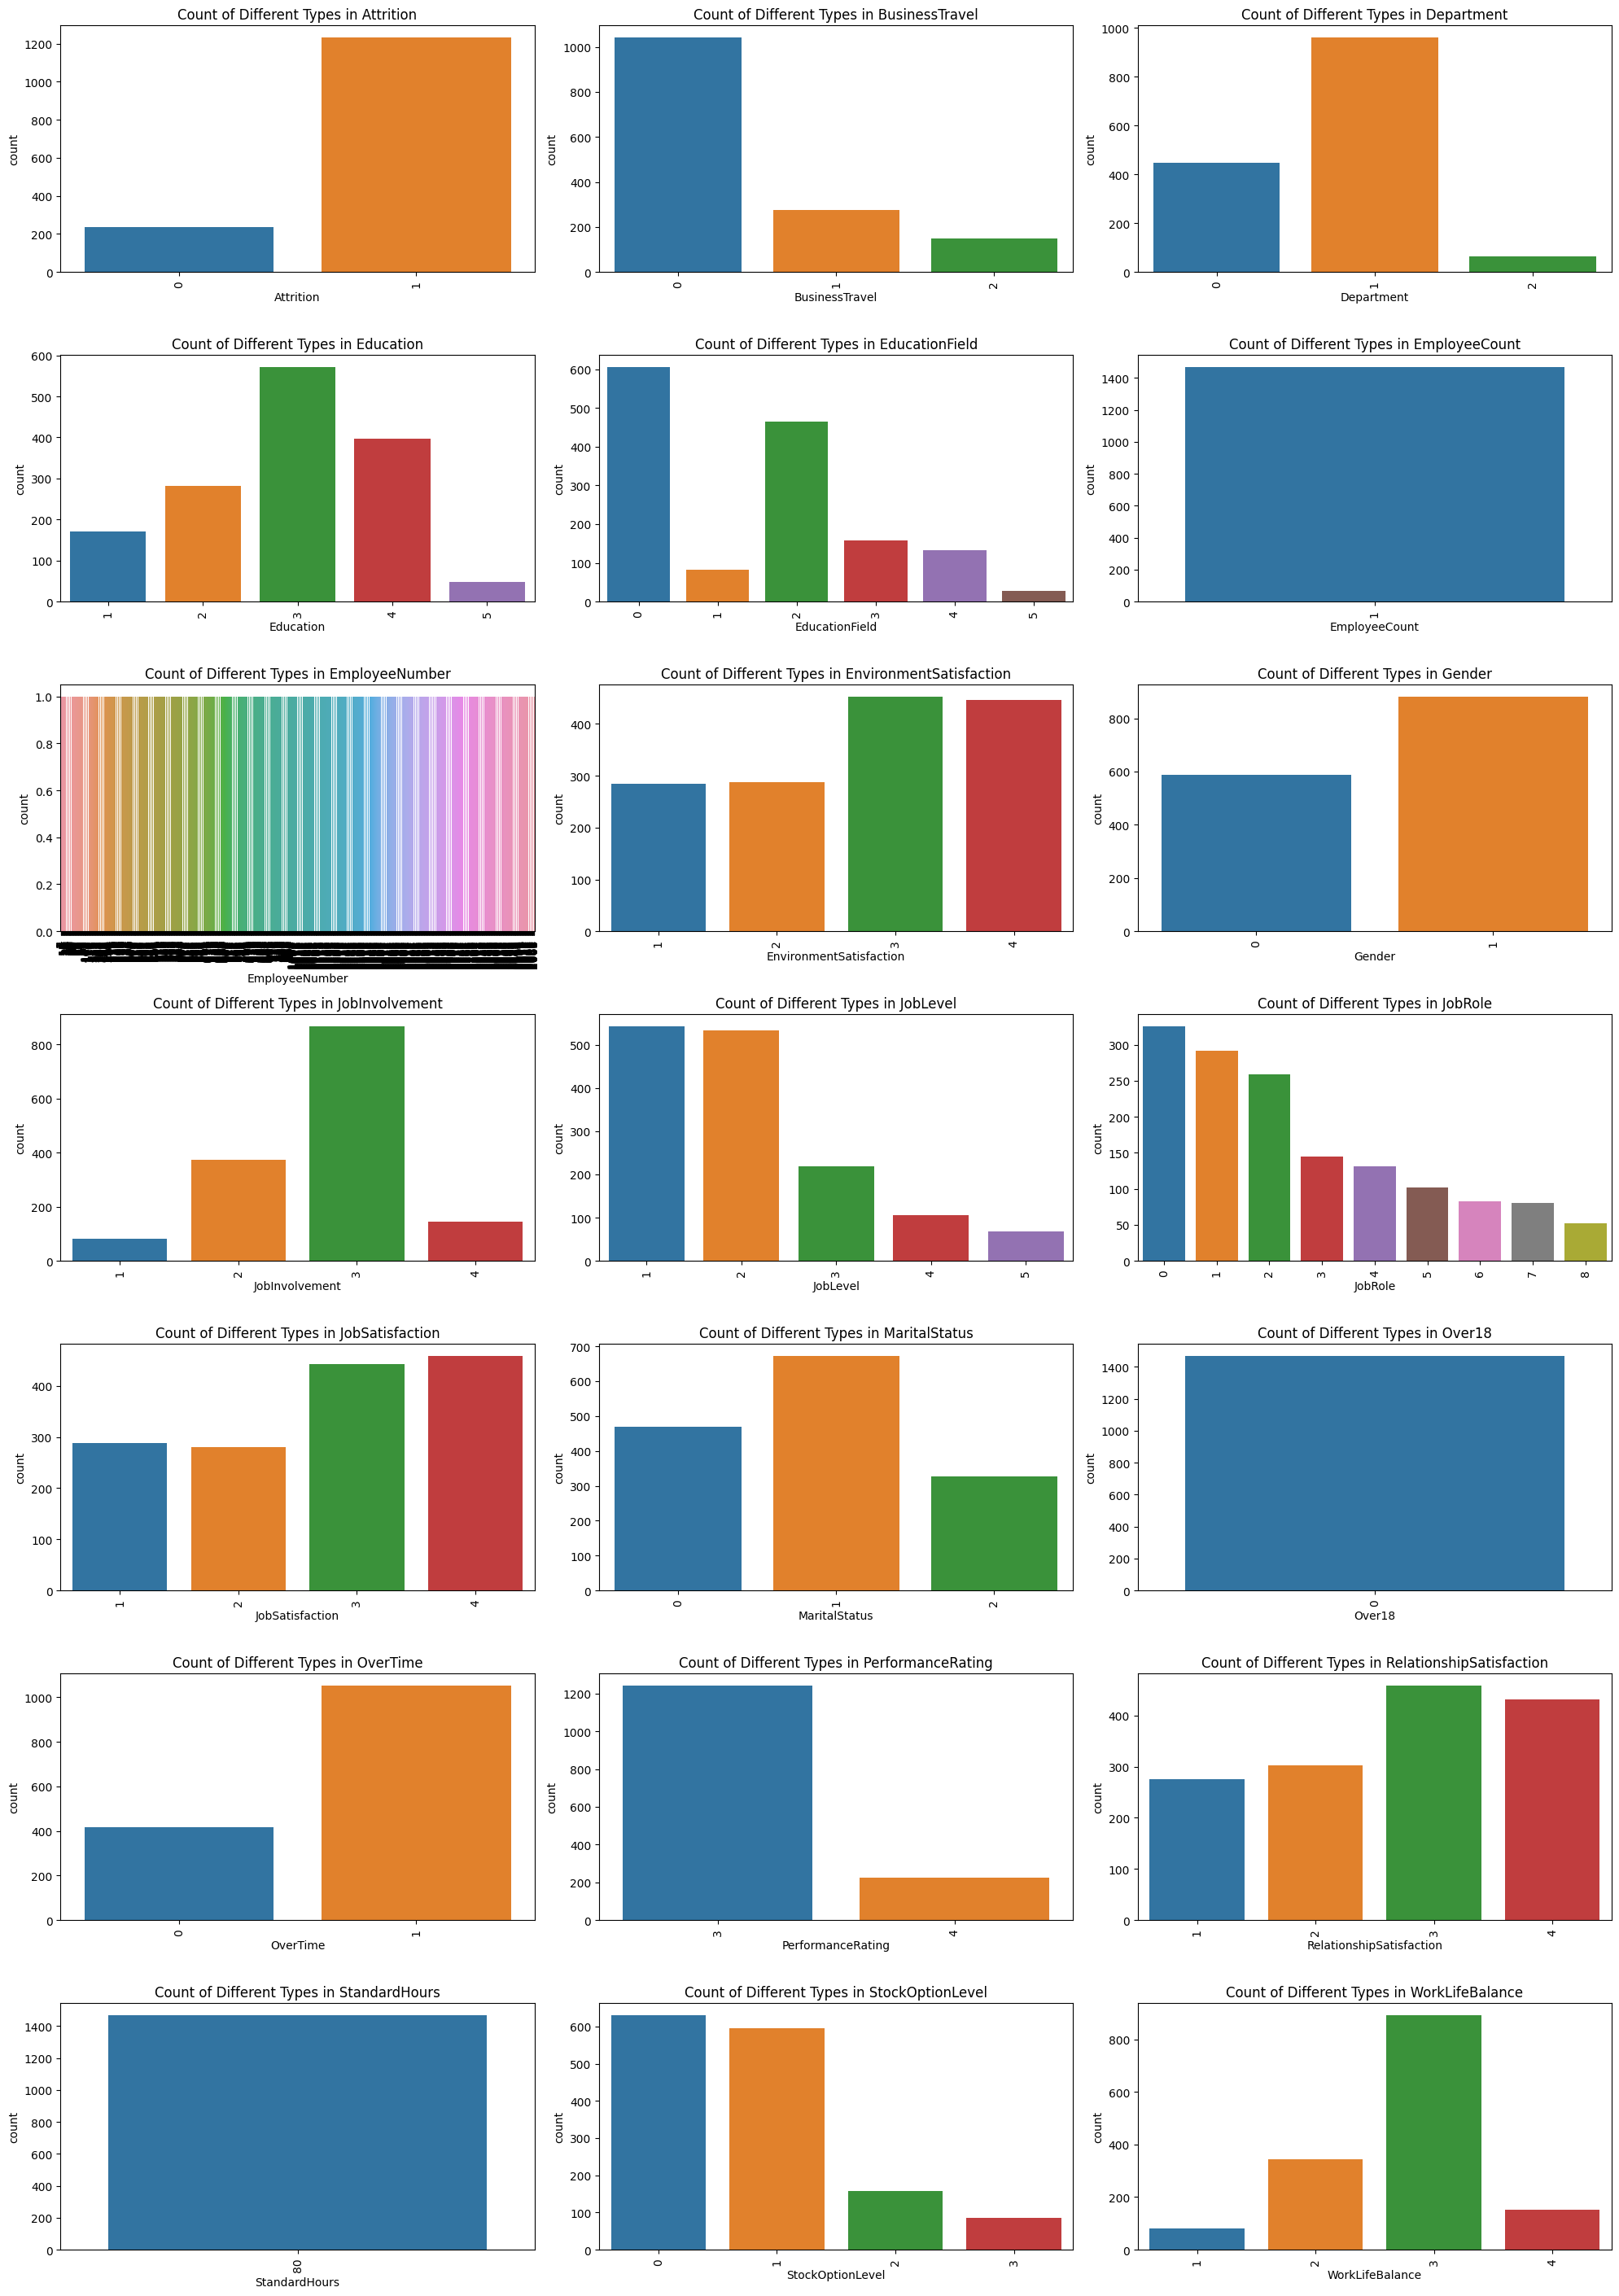

In [25]:

category = [col for col in df_encoded.columns if col not in num]
category_data = df_encoded[category]

plt.figure(figsize = (20, 40))

for i, column in enumerate(category_data.columns):
    plt.subplot(10, 3, i+1)
    sns.countplot(data = category_data, x = column)
    plt.title('Count of Different Types in {}'.format(column))
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [26]:
#Age: More middle-aged employees, between in the 30s and 40s
#Business Trvel: Employee who travel frequently have higher attrition rate
#DistanceFromHome: Mostly within 10 miles.
#Salary Rate: Varies greatly.
#MonthlyIncome: Mostly ranges from 2500 to 7500 dollars per month.
#Working Experience: Most employees have a total working years of 0-10 years and stay in the same company all the time.
#TrainingTimesLastYear: Most employees have 2-3 training times last year.
#Promotion & Teamwork: Employees mostly get promoted about every 2 years, longer for higher position and stay with the same manaGender: More male employees.
#Education: Most employees accomplished bachelor's degree or higher degrees.
#Marital Status: Mostly Married(singles have higher rate)
#Business Travel: Most employees rarely travel.
#Job Content&Department: Most employees studied in the life science or medical field, and the company have more employees in reserch and sale department.
#Job Level: Most employees are in lower levels without stock option or only a few.
#Workload: Most employees do not work overtime.
#Satisfaction & Balance: Most employees have a high level of satisfaction, both with their work environment and workplace relationships, as well as a good work-life balance.ger for the same time or longer.
#Gender: More male employees.

In [27]:
#Correlation Matrix

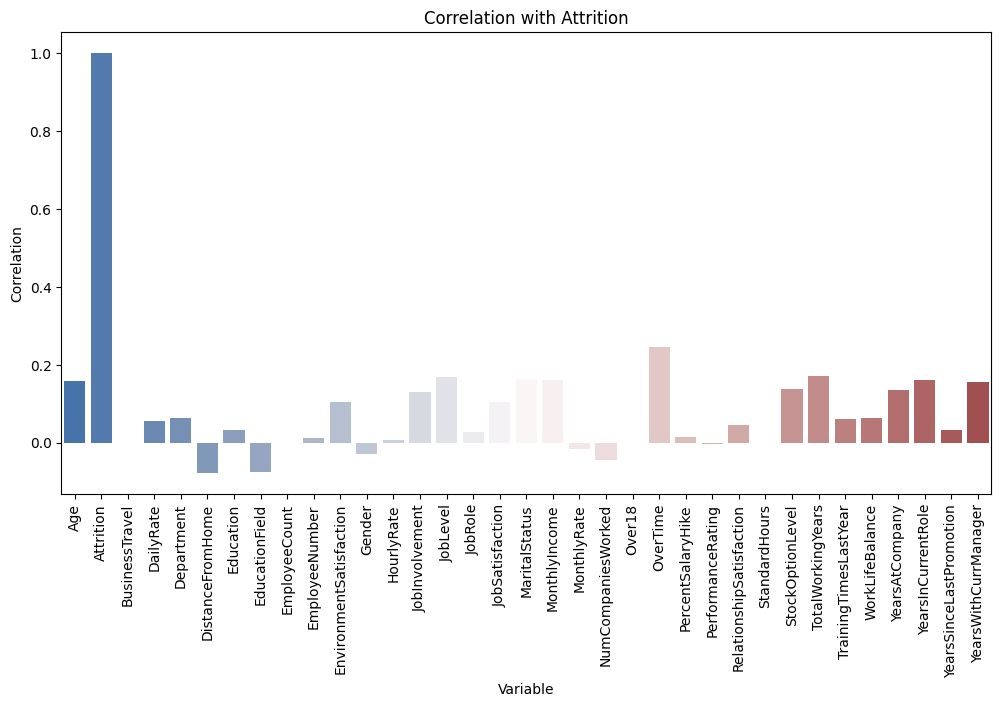

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

correlation_with_attrition = correlation_matrix['Attrition']

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_attrition.index, y=correlation_with_attrition.values,palette = "vlag")
plt.xticks(rotation=90)
plt.title('Correlation with Attrition')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()


In [ ]:
#Highly negative correlation: DistanceFromHome, NumCompaniesWorked, MonthlyRate...
#Highly positive correlation: TotalWorkingYears, JobLevel, YearsInCurrentRole...

In [ ]:
#Employees who travel frequently have higher attrition rate.
#Employees in Sales and Human Resources have higher attrition rate.
#Employees whose MatiralStatus is single have higher attrition rate.
#Employees who often work overtime have higher attrition rate.

In [66]:
#Multicollinearity is when two or more independent variables in a predictive model are highly correlated with each other.
#Multicollinearity can lead to unstable model coefficients. \We need to identify and address multicollinearity among our features.
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_frame.columns

    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Calculate VIF
vif_data = calculate_vif(df)

# Print VIF values
print(vif_data)

# Feature selection based on correlation
vif_filtered = vif_data[vif_data['VIF']<5]

# Use selected features for modeling
selected_features=vif_filtered['Feature']

selected_features_dataset=df[selected_features]
selected_features_dataset.head()

                     Feature        VIF
0                        Age   2.065004
1                  Attrition   1.288231
2             BusinessTravel   1.016559
3                  DailyRate   1.026026
4                 Department   1.399899
5           DistanceFromHome   1.026915
6                  Education   1.065958
7             EducationField   1.024868
8              EmployeeCount   0.000000
9             EmployeeNumber   1.023599
10   EnvironmentSatisfaction   1.035355
11                    Gender   1.024005
12                HourlyRate   1.021922
13            JobInvolvement   1.037060
14                  JobLevel  11.722776
15                   JobRole   1.614881
16           JobSatisfaction   1.041025
17             MaritalStatus   1.860833
18             MonthlyIncome  11.714609
19               MonthlyRate   1.015363
20        NumCompaniesWorked   1.280941
21                    Over18        NaN
22                  OverTime   1.113728
23         PercentSalaryHike   2.529793


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
